## Fast Track Ads Analytics 2021

In [1]:
import numpy as np
import pandas as pd

### A. Маша и единорог (5 баллов)

В магазине рядом с домом Маши проводят акцию и всем покупателям дарят коробки с игрушкой-сюрпризом. Коробки бывают трёх цветов (красные, белые и чёрные), причём красных коробок в магазине в два раза больше, чем чёрных, а чёрных коробок в три раза меньше, чем белых. Маша мечтает найти в коробке игрушечного единорога. Известно, что в красных коробках единорог встречается с вероятностью 5%, в белых — с вероятностью 1%, а в чёрных — с вероятностью 10%.

Вчера Маша открыла свою коробку и в ней оказался единорог. Какова вероятность, что коробка была красной?

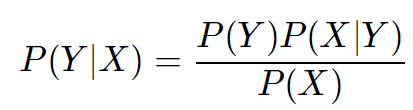

Красные коробки = 2 * Черные коробки
Белые коробки / 3 = Черные коробки -> Белые коробки = 3 * Черные коробки

Красные + белые + черные = 2 * черные + 3 * черные + черные = 6 * черные
2/6 + 3/6 + 1/6 = 1

P(Коробка красная | Достать единорога) = P(Коробка красная) * P(Достать единорога | Коробка красная) / P(X)  

P(X) = P(Достать единорога) = P(Кр.к.) * P(Ед.|Кр.к.) + P(Бел.к.) * P(Ед.|Бел.к.) + P(Чер.к.) * P(Ед.|Чер.к.)                                      

In [2]:
np.round((2/6 * 5/100) / ((2/6 * 5/100) + (3/6 * 1/100) + (1/6 * 10/100)), 3)

0.435

### B. RICK JOIN (5 баллов)

В SQL-базе лежат таблицы characters и adventures. (Полное содержание таблиц приведено в конце задания.) Сколько строк будет в таблице, которая является результатом выполнения запроса? 

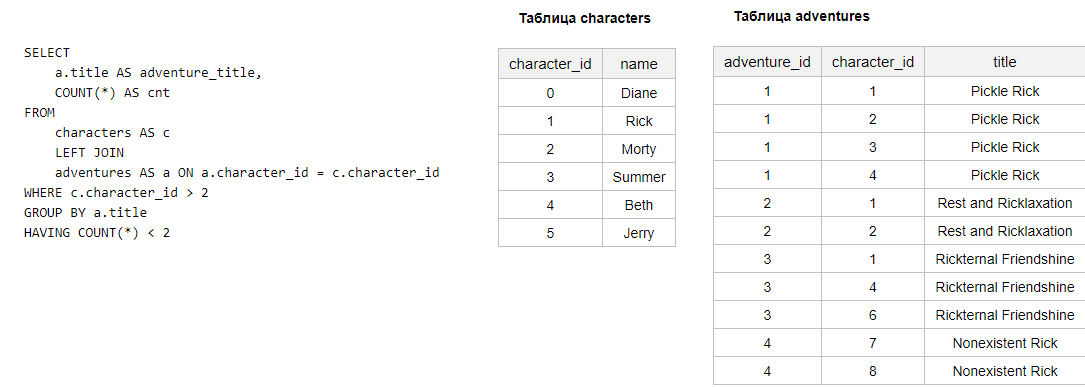

##### 2 строки

### C. Великодушный капитан (10 баллов)

У пиратского капитана есть восьмигранная игральная кость, на гранях которой написаны числа: 1,5,10,15,20,25,30,45.

Капитан предлагает своим пиратам сыграть с ним: пират должен кинуть игральную кость, а капитан обещает заплатить столько монет, сколько написано на выпавшей грани. Капитан великодушен и разрешает дважды перебросить кость, если пират этого захочет. После третьего броска перебрасывать кость уже нельзя.

Каково математическое ожидание выигрыша при оптимальной стратегии? (Для пирата оптимальна та стратегия, при которой он получит как можно больше монет.)

#### Решение

На последнем броске приходится брать то, что выпало. Математическое ожидание последнего шага равно  

1/8 * (1 + 5 + 10 + 15 + 20 + 25 + 30 + 45) = 18.875

На предпоследнем шаге, если выпало 20, 25, 30, 45 (> 18.875) уже не стоит отвергать результат и пытаться ещё раз на последнем броске. А если выпало 1, 5, 10 или 15, то имеет, т.к. математическое ожидание последнего шага 18.875 больше, чем то, что выпало. Математическое ожидание предпоследнего шага равно  
 
4/8 * 18.875 + 1/8 * (20 + 25 + 30 + 45) = 24.438

На первом броске шаге если выпало 1, 5, 10, 15 или 20, то стоит поиграть по оптимальной стратегии на последующих шагах, где математическое ожидание равно 24.438, а если выпало 25, 30 или 45 то лучше остановиться. Математическое ожидание этого шага равно:  

5/8 * 24.4375 + 1/8 * (25 + 30 + 45) = 27.773

В итоге, оптимальная стратегия выглядит так:
* бросить кубик 1-й раз; если выпало 25, 30 или 45, то остановиться;
* бросить кубик 2-й раз; если выпало 20, 25, 30 или 45, то остановиться;
* бросить кубик 3-й раз и взять, что выпало.

In [3]:
third_throw = (1 + 5 + 10 + 15 + 20 + 25 + 30 + 45) / 8
third_throw

18.875

In [4]:
second_third_throw = (4/8) * 18.875 + (20 + 25 + 30 + 45) / 8
second_third_throw

24.4375

In [6]:
first_second_third_throw = (5/8) * 24.4375 + (25 + 30 + 45) / 8
first_second_third_throw

27.7734375

### D. Клики и показы (10 баллов)

В файле task.csv хранится таблица с рекламными событиями. События в таблице описываются следующими полями.

- typeevent: тип события (18 - показ баннера, 95 - клик по баннеру)
- uniqid: идентификатор пользователя
- _date: день, в который произошло событие
- bannerid: id баннера, по которому произошел показ/клик  

На основе имеющихся данных ответьте на вопросы.

В какой из дней был максимальный CTR?  **2021-06-01**  
Чему равно минимальное значение DAU?  **8999**  
Чему равно медианное число показов на одного пользователя?  **115.0**   
Все uniqid состоят из 4 цифр. Какая цифра чаще всего встречается на 2 позиции (индексация с нуля) поля uniqid в логе?  **6**  
Как много пар {пользователь; баннер} таких, что число кликов для них больше, чем число показов?  **1195**  


In [8]:
df = pd.read_csv('task.csv')

In [19]:
df.head()

,typeevent,bannerid,_date,uniqid,show,click
0,18,157626912,2021-06-02,7497,1,0
1,18,157703675,2021-06-01,8343,1,0
2,18,157703675,2021-06-02,9627,1,0
3,18,157703675,2021-06-01,8429,1,0
4,18,157703675,2021-06-02,8488,1,0


In [10]:
# В какой из дней был максимальный CTR?

df['show'] = np.where(df['typeevent'] == 18, 1, 0)
df['click'] = np.where(df['typeevent'] == 95, 1, 0)

CTR = df.groupby('_date')[['show', 'click']].sum()

CTR['CTR'] = CTR['click'] / CTR['show']

CTR[CTR['CTR'] == CTR['CTR'].max()]

,show,click,CTR
_date,,,
2021-06-01,233421,3370,0.014437


In [11]:
# Чему равно минимальное значение DAU?

df.query('typeevent == 18').groupby('_date')['uniqid'].nunique().min()

8999

In [12]:
# Чему равно медианное число показов на одного пользователя?

df.query('typeevent == 18').groupby('uniqid')['bannerid'].count().median()

115.0

In [16]:
# Все uniqid состоят из 4 цифр. Какая цифра чаще всего встречается на 2 позиции (индексация с нуля) поля uniqid в логе?

df.uniqid.apply(lambda x:str(x)[2]).value_counts().head(1)

6    105369
Name: uniqid, dtype: int64

In [18]:
# Как много пар {пользователь; баннер} таких, что число кликов для них больше, чем число показов?

df.groupby(['uniqid','bannerid'], as_index=False)[['show', 'click']].sum().query('click > show').shape[0]

1195

### E. Собери друзей (15 баллов)

Коля хочет собрать друзей у себя, чтобы решить, куда они поедут отдыхать в выходные. В компании Коли полная демократия, решение принимается большинством голосов. Среди друзей есть очень ленивые люди, и они доверили свой голос кому-то из компании.

Каждый друг, готовый явиться на встречу, написал Коле промежутки времени, когда он сможет присутствовать в единой точке голосования и сколько людей ему доверили проголосовать за них. Друзья у Коли работают очень слаженно и могут принять решение за очень маленький промежуток времени, даже когда один из них только явился на встречу, а второй уже будет уходить.

Помогите Коле понять, какое максимальное количество голосов он сможет собрать, если выберет оптимальное время.

### Формат ввода

На вход подается файл, в первой строке которого написано количество друзей Коли, которые готовы прийти в точку голосования. В каждой следующей строке записана информация про одного из них через пробел: время, когда он сможет прийти, время, когда ему нужно будет уходить, сколько друзей доверили ему свой голос.

Все числа в файле целые, неотрицательные и не превосходят 100 000.

### Формат вывода
Одно целое число

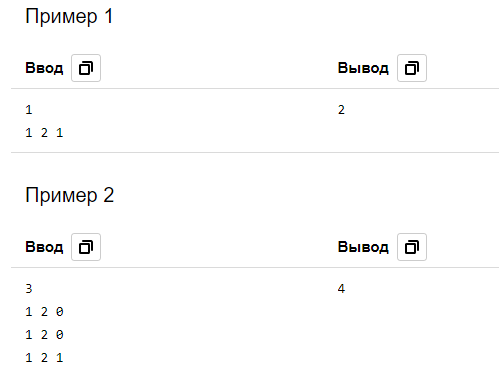
